* 데이터셋 : https://archive.ics.uci.edu/ml/datasets/Online+Retail#
## 라이브러리 로드

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## 폰트 설정

In [ ]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [ ]:
# pd.read_excel 로 데이터를 불러옵니다.
# 데이터의 용량이 커서 로드하는데 1분 이상 걸릴 수도 있습니다. 또 read_excel은 시간이 오래 걸립니다.
# csv로 로드하는 것이 훨씬 빠릅니다.
# df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
# df = pd.read_excel("data/Online Retail.xlsx")




In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021_10_26_박조은 강사님 실습(retail 분석)/online_retail.csv')

In [39]:
df.shape

(541909, 8)

## 데이터 미리보기 및 요약

In [40]:
# 데이터 프레임에서 가장 앞에 있는 5개의 행(기본값)을 출력합니다.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [41]:
# 데이터 프레임에서 가장 끝에 있는 5개의 행(기본값)을 출력합니다.
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [42]:
# 데이터 집합과 각 열들의 자료형을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Attribute Information:

- InvoiceNo: 송장번호. 해당 거래에 할당된 6자리 정수
  * 이 코드가 문자 'c'로 시작하면 취소를 나타냅니다.
- StockCode: 제품 코드. 각 고유 제품에 고유하게 할당된 5자리 정수
- Description: 제품 이름
- Quantity: 거래당 각 제품의 수량 
  * 이 코드가 ‘-’(마이너스)로 시작하면 취소를 나타냅니다.
- InvoiceDate:  송장 날짜 및 시간. 숫자, 각 거래가 생성된 날짜 및 시간
- UnitPrice: 단가. 숫자, 스털링(영국 화폐) 단위의 제품 가격
- CustomerID: 고객 번호. 해당 고객에게 고유하게 할당된 5자리 정수
- Country: 국가 이름. 해당 고객이 거주하는 국가의 이름

## 기술통계

In [43]:
# describe 를 통해 수치 타입의 기술통계를 구합니다.
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [44]:
# describe 를 통해 object 타입의 기술통계를 구합니다.
df.describe(include = 'object')
#df['InvoiceNo'].value_counts()

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


## 결측치

In [45]:
# 결측치 합계를 구합니다.
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [46]:
# 결측치 비율을 구합니다.
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

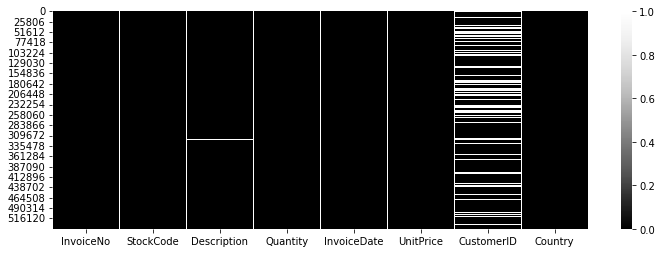

In [47]:
 # 결측치를 시각화 합니다.
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cmap = 'Greys_r')

## 히스토그램으로 전체 수치변수 시각화

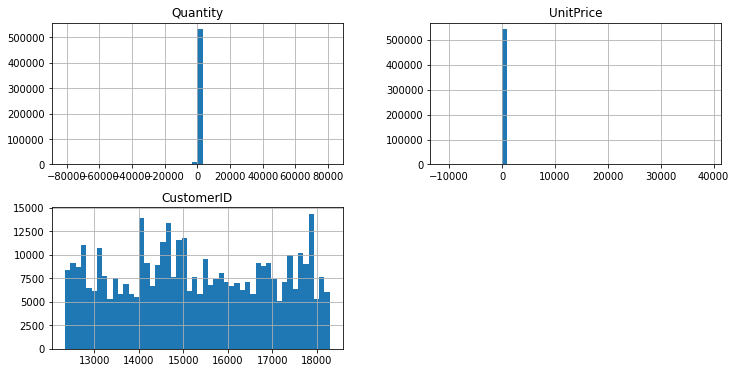

In [48]:
# 히스토그램은 측정값을 몇 구간으로 나누어 도수분포로 나타낸 plot입니다.
_ = df.hist(figsize = (12,6) , bins = 50)

## 전체 주문금액 파생변수 만들기
* 수량 X 금액으로 전체 금액 계산하기

In [49]:
# TotalPrice 는 RFM 중 MonetaryValue의 값이 됩니다.
 #df["TotalPrice"] = df['UnitPrice'] * df['Quantity']
 df['TotalPrice'] = df['UnitPrice'] * df['Quantity']



IndentationError: ignored

In [50]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']


In [51]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## 회원 vs 비회원 구매

In [52]:
# CustomerID값이 결측치인 값에 대한 Country값을 가져와 빈도수를 구합니다.
df.loc[df['CustomerID'].isnull(), "Country"].value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

In [53]:
# CustomerID값이 결측치가 **아닌** 값에 대한 Country값을 가져와 빈도수를 구합니다.
df.loc[df['CustomerID'].notnull(), "Country"].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [57]:
# 결측치 여부 컬럼 생성합니다.
df["id_null"] = df["CustomerID"].isnull()

In [58]:
# 결측치 여부 컬럼을 통해 비회원 구매 빈도수를 구합니다.
df["id_null"].value_counts()

False    406829
True     135080
Name: id_null, dtype: int64

In [60]:
# 결측치 여부 컬럼을 통해 비회원 구매 비율를 구합니다.
df['id_null'].value_counts(normalize = True)

False    0.750733
True     0.249267
Name: id_null, dtype: float64

In [61]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False


## 매출액 상위 국가

In [71]:
# 국가별 매출액의 평균과 합계를 구합니다.
# TotalPrice를 통해 매출액 상위 10개만 가져옵니다.
# top_sale_country
top_sale_country = df.groupby("Country")["TotalPrice"].agg(["mean", "sum"]).sort_values('sum', ascending = False)
top_sale_country.head(10)
#top_sale_country.head(10).style.format("{: }")


,mean,sum
Country,,
United Kingdom,16.525065,8.187806e+06
Netherlands,120.059696,2.846615e+05
EIRE,32.122599,2.632768e+05
Germany,23.348943,2.216982e+05
France,23.069288,1.974039e+05
Australia,108.877895,1.370773e+05
Switzerland,28.164510,5.638535e+04
Spain,21.624390,5.477458e+04
Belgium,19.773301,4.091096e+04


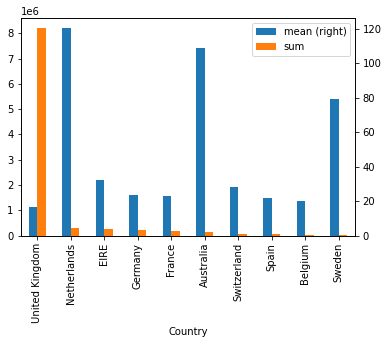

In [75]:
# 위에서 구한 결과를 barplot으로 시각화 합니다.
# 스케일이 다르기 때문에 2축 그래프를 사용하지만 두 가지 값을 비교하기에 적절해 보이진 않습니다.
top_sale_country.head(10).plot.bar(secondary_y ='mean')

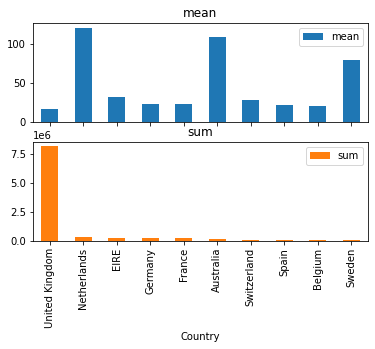

In [78]:
# 서브플롯으로 다시 시각화 해봅니다.
_ = top_sale_country.head(10).plot.bar(subplots = True)

## 고객별 구매 취소 비율

In [79]:
# 고객벽 구매 취소 비율을 찾기 위해 Cancel 컬럼을 생성합니다.
# Quantity 가 0보다 작다면 True, 0보다 크다면 False 값으로 Cancel 컬럼을 생성합니다.
df['Cancel'] = df['Quantity'] < 0

stack과 unstack의 표기 형태를 비교합니다.(출처: [판다스 공식문서](https://pandas.pydata.org/))

<img src='https://pandas.pydata.org/docs/_images/reshaping_stack.png'>
<img src='https://pandas.pydata.org/docs/_images/reshaping_unstack.png'>

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,False


In [94]:
# CustomerID, Cancel로 그룹화 하여 InvoiceNo 의 빈도율를 구합니다. => cancel_customer
# 고객별(CustomerID) Cancel 빈도율(cancel_ratio)를 구합니다. => cancel_customer["cancel_ratio"]
# cancel_customer
# cancel_customer["cancel_ratio"]
cancel_customer = df.groupby(['CustomerID', "Cancel"])['InvoiceNo'].count().unstack()
cancel_customer['cancel_ratio'] = (cancel_customer[True] / cancel_customer[False]) * 100
cancel_customer.sort_values(True, ascending = False).head(20)

Cancel,False,True,cancel_ratio
CustomerID,,,
14911.0,5677.0,226.0,3.980976
17841.0,7847.0,136.0,1.733146
17511.0,963.0,113.0,11.734164
15311.0,2379.0,112.0,4.707860
12607.0,101.0,101.0,100.000000
14410.0,194.0,93.0,47.938144
13798.0,349.0,90.0,25.787966
14606.0,2700.0,82.0,3.037037
13113.0,201.0,79.0,39.303483


### 특정 고객의 구매 건 조회

In [95]:
# 취소 건을 조회합니다. 
# 취소 건은 InvoiceNo 에 C를 붙이고 Quantity 를 마이너스로 표기되어 있습니다.
df[df['CustomerID'] ==14911]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE,39.8,False,False
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,17.7,False,False
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,15.3,False,False
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE,42.5,False,False
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE,13.5,False,False
...,...,...,...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE,17.0,False,False
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,False,False
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,False,False
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5,False,False


### 제품별 구매 취소 비율

In [96]:
# StockCode, Cancel로 그룹화 하여 InvoiceNo 의 빈도율를 구합니다. => cancel_stock
# 제품별(StockCode) Cancel 빈도율(cancel_ratio)를 구합니다. => cancel_stock["cancel_ratio"]

cancel_StockCode = df.groupby(['StockCode', "Cancel"])['InvoiceNo'].count().unstack()
cancel_StockCode['cancel_ratio'] = (cancel_StockCode[True] / cancel_StockCode[False]) * 100
cancel_StockCode.sort_values(True, ascending = False).head(20)

Cancel,False,True,cancel_ratio
StockCode,,,
M,327.0,244.0,74.617737
22423,2019.0,184.0,9.113422
POST,1130.0,126.0,11.150442
22960,1142.0,87.0,7.618214
D,NaN,77.0,NaN
22720,1401.0,76.0,5.424697
21232,843.0,61.0,7.236062
S,2.0,61.0,3050.000000
22699,1084.0,54.0,4.981550


In [98]:
df[df['StockCode'] =="M"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,1.25,False,False
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,18.95,False,False
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom,2.55,True,False
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,1.70,False,False
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,5.04,False,False
...,...,...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,5.00,False,False
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,-125.00,False,True
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,-9.95,False,True
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom,1.26,False,False


### 국가별 구매 취소 비율

In [97]:
# Country, Cancel로 그룹화 하여 InvoiceNo 의 빈도율를 구합니다. => cancel_country
# 국가별(Country) Cancel 빈도율(cancel_ratio)를 구합니다. => cancel_country["cancel_ratio"] 
# cancel_country
# cancel_country["cancel_ratio"]
cancel_Country = df.groupby(['Country', "Cancel"])['InvoiceNo'].count().unstack()
cancel_Country['cancel_ratio'] = (cancel_Country[True] / cancel_Country[False]) * 100
cancel_Country.sort_values(True, ascending = False).head(20)

Cancel,False,True,cancel_ratio
Country,,,
United Kingdom,486286.0,9192.0,1.890246
Germany,9042.0,453.0,5.009954
EIRE,7894.0,302.0,3.825690
France,8408.0,149.0,1.772122
USA,179.0,112.0,62.569832
Australia,1185.0,74.0,6.244726
Spain,2485.0,48.0,1.931590
Italy,758.0,45.0,5.936675
Belgium,2031.0,38.0,1.871000


## 날짜와 시간

In [100]:
# InvoiceDate를 datetime 모듈을 통해 날짜형식으로 변환해 줍니다.
# df["InvoiceDate"]
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head(1)

0   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [103]:
# year, month, day, dayofweek 를 InvoiceDate에서 추출하여 파생변수로 생성합니다.
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,False,2010,12,1,2


In [104]:
# day_name() 을 통해 InvoiceDate 에서 요일명을 추출하여 파생변수로 생성합니다.
df["InvoiceDayname"] = df["InvoiceDate"].dt.day_name()
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceDayname
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,False,2010,12,1,2,Wednesday


In [111]:
# InvoiceDate 에서 앞에서 7개문자만 가져오면([:7]) 연, 월만 따로 생성합니다.
df["InvoiceYM"] = df["InvoiceDate"].astype(str).str[:7]
df[['InvoiceDate', 'InvoiceYM']].sample(5)
#df.head(1)

,InvoiceDate,InvoiceYM
205092,2011-05-26 10:25:00,2011-05
469995,2011-11-15 16:42:00,2011-11
139143,2011-03-30 12:00:00,2011-03
249352,2011-07-04 16:18:00,2011-07
522492,2011-12-04 11:45:00,2011-12


In [112]:
# InvoiceDate 에서 time, hour 에 대한 파생변수도 생성합니다.
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["InvoiceHour"] = df["InvoiceDate"].dt.hour
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceDayname,InvoiceYM,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8


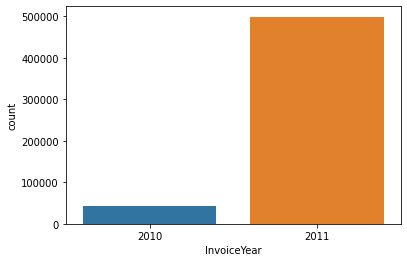

In [113]:
# countplot 으로 연도(InvoiceYear)별 구매 빈도수 시각화합니다.
sns.countplot(data = df, x = 'InvoiceYear')


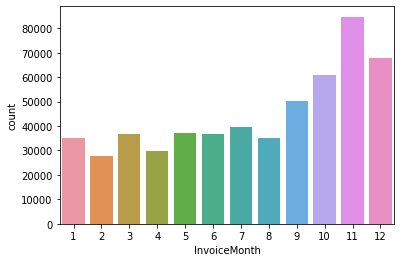

In [114]:
# countplot 으로 월(InvoiceMonth)별 구매 빈도수 시각화합니다.
sns.countplot(data = df, x = 'InvoiceMonth')

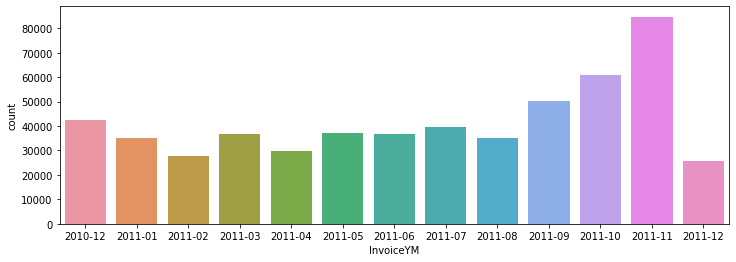

In [115]:
# countplot 으로 연도-월별(InvoiceYM) 구매 빈도수 시각화합니다.
plt.figure(figsize=(12, 4))
sns.countplot(data = df, x = 'InvoiceYM')

In [116]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceDayname,InvoiceYM,InvoiceTime,InvoiceHour
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12


### 요일별 빈도수

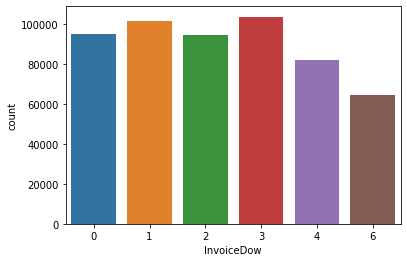

In [118]:
# countplot 으로 요일별( InvoiceDow ) 구매 빈도수 시각화합니다.
sns.countplot(data = df, x = 'InvoiceDow')

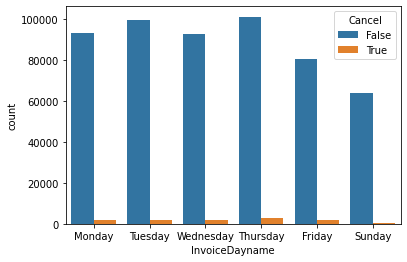

In [123]:
# countplot으로 요일별( InvoiceDow ) 구매와 취소 빈도수 시각화합니다.
# hue 옵션을 사용하면 특정 컬럼을 지정해서 표기할 수 있습니다.
# hue="Cancel" 로 취소여부도 함께 봅니다.
sns.countplot(data = df.sort_values(by = 'InvoiceDow'), x = 'InvoiceDayname', hue = "Cancel")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_

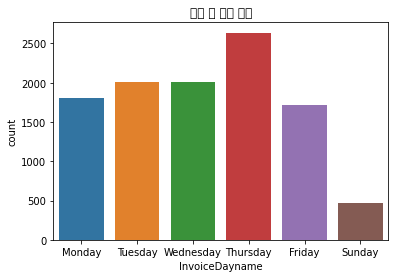

In [125]:
# countplot으로 요일별( InvoiceDow ) 구매 **취소** 빈도수 시각화합니다.
# df["Cancel"] == True 인 데이터로 구매 취소된 값만 추출합니다.
plt.title("요일 별 구매 취소")
sns.countplot(data = df[df['Cancel']].sort_values("InvoiceDow"), x = "InvoiceDayname")

In [127]:
# 리스트컴프리헨션(List comprehension)을 통해 "월~일"요일 문자열을 리스트로 만듭니다.
# 리스트컴프리헨션(List comprehension)은 리스트 내부에서 반복문을 작성하여 반복하는 형식입니다.
# "월화수목금토일" 을 ['월', '화', '수', '목', '금', '토', '일'] 로 만듭니다.
# day_name
day_name = [w for w in"월화수목금토일"]
day_name

['월', '화', '수', '목', '금', '토', '일']

In [128]:
# 데이터를 보면 토요일이 없습니다. 그래서 토요일은 제거합니다.

day_name.remove("토")

In [133]:
# value_counts()로 요일별( InvoiceDow ) 구매 빈도수를 구합니다.
# dow_count
dow_count = df["InvoiceDow"].value_counts().sort_index()
dow_count.index = day_name
dow_count

월     95111
화    101808
수     94565
목    103857
금     82193
일     64375
Name: InvoiceDow, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

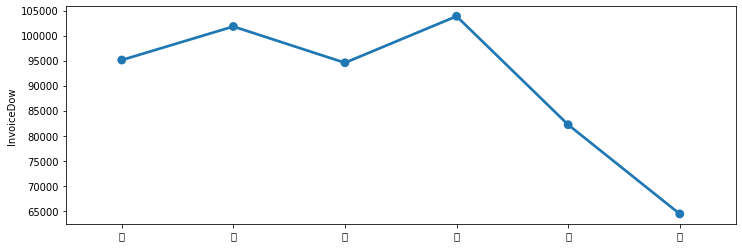

In [136]:
# 위에서 구한 요일별 구매 빈도수( dow_count )를 pointplot으로 시각화 합니다.
plt.figure(figsize=(12, 4))
sns.pointplot(x = dow_count.index, y=dow_count)

In [138]:
# 시간별( InvoiceHour ), 요일별( InvoiceDow )로 crosstab 을 통해 구매 빈도수 구합니다.
# order_hour_dow
order_hour_dow = pd.crosstab(df['InvoiceHour'], df['InvoiceDow'])
order_hour_dow

InvoiceDow,0,1,2,3,4,6
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,1641,1751,1826,1834,1857,0
9,7497,6440,5186,8060,7119,30
10,8872,9125,7904,9321,10215,3600
11,8926,10052,9973,8369,9589,10765
12,11801,14327,14527,13485,10942,13627
13,12756,12619,11901,12428,10488,12067
14,11502,11656,11006,11518,11737,10052


In [139]:
order_hour_dow.columns

Int64Index([0, 1, 2, 3, 4, 6], dtype='int64', name='InvoiceDow')

In [148]:
# 리스트컴프리헨션(List comprehension)을 통해 토요일을 제외한 
# "월화수목금일"요일 문자열을 리스트를 컬럼명으로 대체합니다.
# 위에서 구한 값을 .style.background_gradient() 통해서 시각화합니다.
# order_hour_dow
 #order_hour_dow= "월화수목금일"

order_hour_dow.columns = [w for w in "월화수목금일"]
order_hour_dow.style.background_gradient()

,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,1641,1751,1826,1834,1857,0
9,7497,6440,5186,8060,7119,30
10,8872,9125,7904,9321,10215,3600
11,8926,10052,9973,8369,9589,10765
12,11801,14327,14527,13485,10942,13627
13,12756,12619,11901,12428,10488,12067
14,11502,11656,11006,11518,11737,10052


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

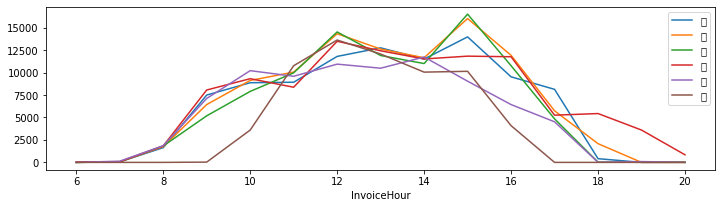

In [150]:
# 시간별_요열별 구매 주문( order_hour_dow )을 시각화합니다.
order_hour_dow.plot(figsize = (12,3))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

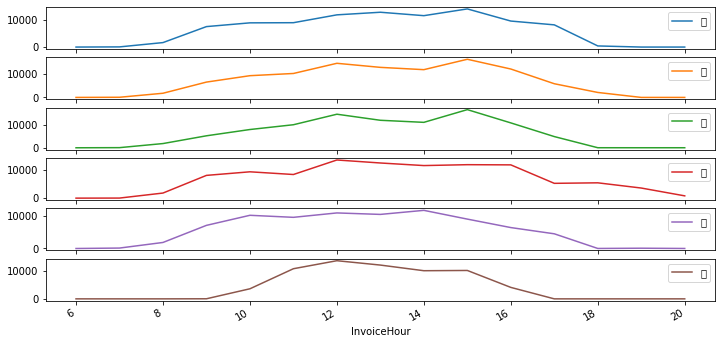

In [152]:
# 시간별_요열별 구매 주문( order_hour_dow )을 subplot을 통해 요일별 시각화합니다.

_ = order_hour_dow.plot(figsize =(12,6), subplots = True)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

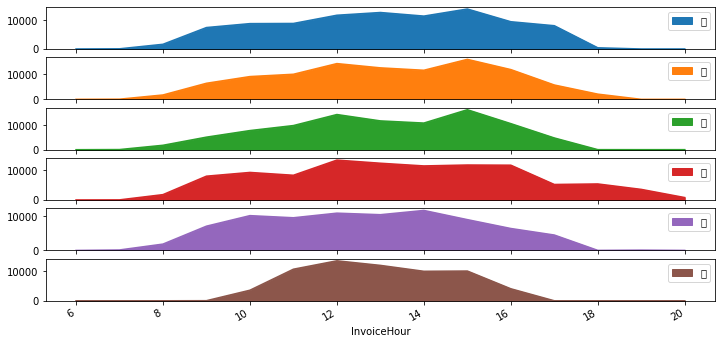

In [154]:
# 시간별_요열별 구매 주문( order_hour_dow )을 subplot을 통해 요일별 시각화합니다.

_ = order_hour_dow.plot.area(figsize =(12,6), subplots = True)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

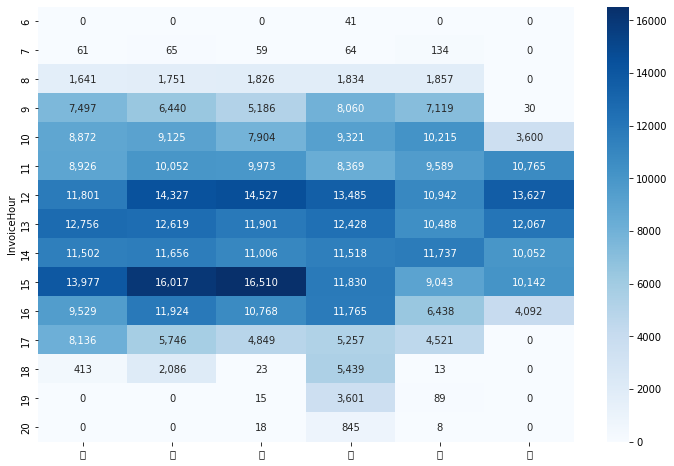

In [159]:
# 시간별_요열별 구매 주문( order_hour_dow )을 heatmap을 통해 구매 빈도수를 시각화합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(order_hour_dow, annot = True, fmt = ',.0f', cmap = 'Blues')


### 시간대 빈도수

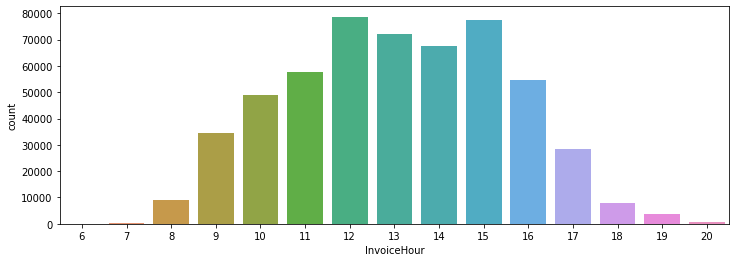

In [162]:
# countplot으로 시간대( InvoiceHour ) 구매 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
sns.countplot(data = df, x = "InvoiceHour")

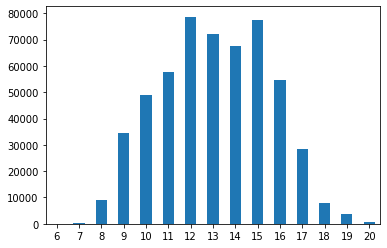

In [163]:
# value_counts으로 시간대( InvoiceHour ) 구매 빈도수를 구합니다.

hour_count = df['InvoiceHour'].value_counts().sort_index()
hour_count.plot.bar(rot = 0)

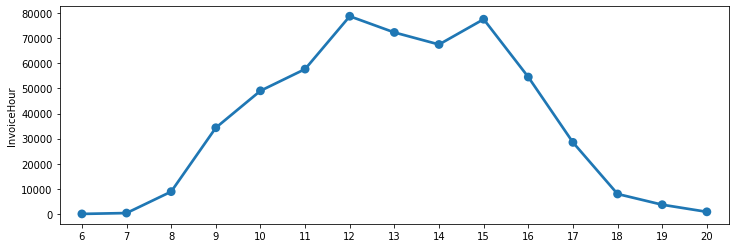

In [165]:
# pointplot 으로 시간대( InvoiceHour ) 구매 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
sns.pointplot(x = hour_count.index, y = hour_count)

## 고객ID가 없는 주문과 취소 주문은 전체 데이터에서 제외

* 취소와 취소에 대한 본 주문건 제거
* 고객ID가 없는 건도 제거

In [167]:
# 취소 건과 취소에 대한 본 주문건 제거를 위해 중복데이터 확인하기 위해 전처리를 합니다.
# InvoiceNo 를 표기형태를 통일한 파생변수( InvoiceNoRemoveC )를 생성합니다.
# df["InvoiceNoRemoveC"]

#df[df['InvoiceNo'].str.contains("C")]
df['InvoiceNoRemoveC'] = df['InvoiceNo'].str.replace("C","")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceDayname,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceNoRemoveC


In [171]:
# InvoiceNo 를 표기형태를 통일한 파생변수( InvoiceNoRemoveC )를 생성합니다.
# df["InvoiceNoRemoveC"]
df[df["InvoiceNoRemoveC"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceDayname,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceNoRemoveC


In [172]:
# "InvoiceNoRemoveC", "StockCode", "Description", "CustomerID" 가 중복인 데이터를 확인합니다.
df[df.duplicated(['InvoiceNoRemoveC', "StockCode", "Description", "CustomerID"])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceDayname,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceNoRemoveC
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,3.75,False,False,2010,12,1,2,Wednesday,2010-12,09:41:00,9,536381
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,6.35,False,False,2010,12,1,2,Wednesday,2010-12,11:45:00,11,536409
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,10.50,False,False,2010,12,1,2,Wednesday,2010-12,11:45:00,11,536409
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,False,False,2010,12,1,2,Wednesday,2010-12,11:45:00,11,536409
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,12.70,False,False,2010,12,1,2,Wednesday,2010-12,11:45:00,11,536409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,1.95,False,False,2011,12,9,4,Friday,2011-12,11:34:00,11,581538
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom,0.65,False,False,2011,12,9,4,Friday,2011-12,11:34:00,11,581538
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom,5.45,False,False,2011,12,9,4,Friday,2011-12,11:34:00,11,581538
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2.10,False,False,2011,12,9,4,Friday,2011-12,11:34:00,11,581538


In [175]:
# "CustomerID" 가 있고(notnull) "Quantity", "UnitPrice" 가 0보다 큰 데이터를 가져옵니다.
# 구매하고 취소한 건 중 취소한 건만 제외하고 구매 건은 남깁니다.
# 유효한 데이터를 df_valid 변수에 할당합니다.
# df_valid 
df_valid = df[df['CustomerID'].notnull() & (df["Quantity"]> 0) & (df["UnitPrice"]> 0)]
df_valid.shape

(397884, 20)

In [176]:
# 고객ID가 없는 건도 제거하여 df_valid 변수에 할당합니다.
df_valid = df_valid.drop_duplicates()
df_valid.shape


(392692, 20)

## 고객

In [177]:
# df_valid(유효고객, 유효주문) 내 고객별( CustomerID ) 구매( InvoiceNo ) 빈도수를 구합니다.

cust_count = df_valid.groupby("CustomerID")["InvoiceNo"].count()
cust_count


CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Name: InvoiceNo, Length: 4338, dtype: int64

In [178]:
# 고객별( CustomerID ) 구매( InvoiceNo ) 빈도수의 기술통계 값을 확인합니다.
cust_count.describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: InvoiceNo, dtype: float64

In [181]:
# cust_count.to_frame(name="count") 으로 데이터 타입을 Series에서 Dataframe으로 변환합니다.

df_cust_count = cust_count.to_frame(name = 'count')
df_cust_count


,count
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


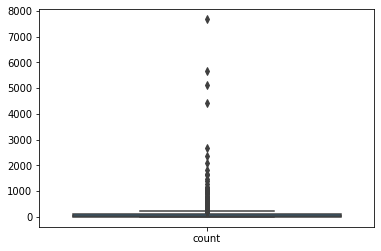

In [182]:
# df_cust_count 를 boxplot 으로 시각화합니다.
sns.boxplot(data = df_cust_count)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f957b9efc90>]],
      dtype=object)

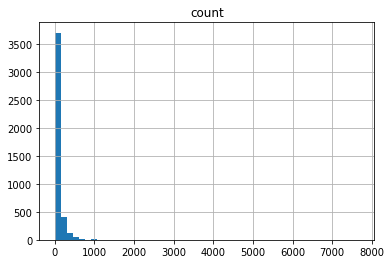

In [183]:
df_cust_count.hist(bins = 50)

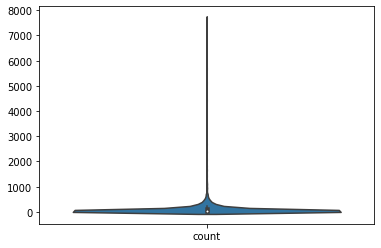

In [184]:
sns.violinplot(data = df_cust_count)

## 월단위 데이터 전처리

In [186]:
# get_month_day1() 함수를 통해 " 연도-월-1 " 형식으로 만듭니다.
# 일자를 " 1 "로 통일화한 이유는 월별 잔존률을 구하기 위해서 입니다.(월 단위)
def get_month_day1(x): 
    return dt.datetime(x.year, x.month, 1)

In [187]:
# map() 함수를 통해 get_month_day1() 함수를 df_valid(유효고객, 유효주문)에 일괄 적용합니다.
# " 연도-월-1 "로 표기가 통일된 InvoiceDate1 이라는 파생변수를 생성합니다.
df_valid["InvoiceDate1"] = df_valid["InvoiceDate"].map(get_month_day1)

In [188]:
# InvoiceDate1 고객별로 최초 구매월( 'min' )을 구합니다.
df_valid.groupby("CustomerID")["InvoiceDate1"].transform("min")

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: InvoiceDate1, Length: 392692, dtype: datetime64[ns]

In [189]:
# 최초 구매일( InvoiceDateMin )에 InvoiceDate1의 최솟값을 구하여 할당합니다.
# 일자가 " 1 "로 통일되어 있어 " 최근 구매일 - 최초 구매일 "로 첫 구매 후 몇달 후 구매인지를 알 수 있습니다.
df_valid["InvoiceDateMin"] = df_valid.groupby("CustomerID")["InvoiceDate1"].transform("min")


In [191]:
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,id_null,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceDayname,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceNoRemoveC,InvoiceDate1,InvoiceDateMin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,2010,12,1,2,Wednesday,2010-12,08:26:00,8,536365,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12,581587,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12,581587,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12,581587,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,False,2011,12,9,4,Friday,2011-12,12:50:00,12,581587,2011-12-01,2011-08-01


In [194]:
# 연도별 차이( year_diff )와 월별 차이( month_diff )를 구합니다.
# year_diff
# month_diff
year_diff = df_valid["InvoiceDate1"].dt.year - df_valid['InvoiceDateMin'].dt.year
month_diff = df_valid["InvoiceDate1"].dt.month - df_valid['InvoiceDateMin'].dt.month

In [195]:
# " 연도차이 * 12개월 + 월차이 + 1 "로 첫 구매 후 몇달 후 구매인지 알 수 있도록 CohortIndex 변수를 생성합니다.
# 2010-12-01부터 2011-12-01의 데이터를 기반으로 진행되어 CohortIndex 변수의 최소값은 1이며, 최대값 13입니다.
df_valid["CohortIndex"] = year_diff * 12 + month_diff +1

### 코호트 월별 빈도수

In [198]:
# CohortIndex 값으로 월별 잔존 구매에 대한 빈도수를 구합니다.
# 회원가입 후 월별 구매 빈도수를 value_counts 로 구합니다.
df_valid["CohortIndex"].value_counts().sort_index(ascending = False)

13      7173
12     23011
11     20098
10     22968
9      22751
8      23298
7      23462
6      26673
5      25165
4      26993
3      26727
2      27516
1     116857
Name: CohortIndex, dtype: int64

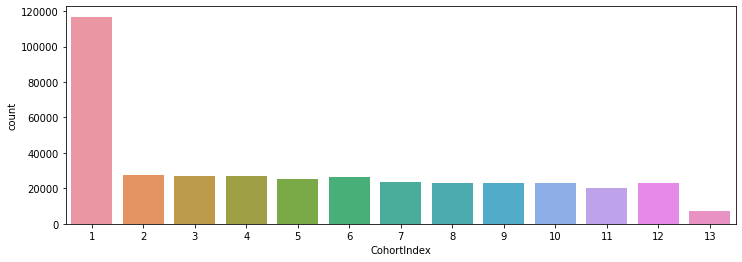

In [199]:
# countplot 으로 CohortIndex 의 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
sns.countplot(data = df_valid, x = "CohortIndex")

## 월별, 주문건, 주문제품 종류 수, 중복을 제외한 고객 수, 총 주문금액

In [200]:
# df_valid(유효고객, 유효주문)에 대해 월별 데이터( InvoiceMonth )를 확인합니다.
# InvoiceNo 의 수
# StockCode, CustomerID 의 유일값의 수
# UnitPrice, Quantity, TotalPrice 의 sum
df_valid.groupby('InvoiceMonth').agg({"InvoiceNo":"count", 
                                      "StockCode":"nunique", 
                                      "CustomerID":"nunique",
                                      "UnitPrice":"sum",
                                      "Quantity":"sum",
                                      "TotalPrice":"sum"
                                     }).style.format("{:,}")

,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceMonth,,,,,,
1,"20,988","2,121",741,"66,234.64999999169","348,473","568,101.310000008"
2,"19,706","2,124",758,"62,619.479999992334","265,027","446,084.92000001646"
3,"26,870","2,234",974,"87,864.78999998671","347,582","594,081.7600000132"
4,"22,433","2,217",856,"78,543.48099999051","291,366","468,374.33100001334"
5,"28,073","2,219","1,056","101,500.9099999869","372,864","677,355.1500000018"
6,"26,926","2,339",991,"84,602.65999999098","363,014","660,046.0500000116"
7,"26,580","2,351",949,"75,454.52099999285","367,360","598,962.901000014"
8,"26,790","2,356",935,"78,877.08999999246","397,373","644,051.0400000094"
9,"39,669","2,545","1,266","118,160.32199998526","543,652","950,690.201999996"


## 잔존 빈도 구하기

In [203]:
# InvoiceDateMin , CohortIndex 로 그룹화 하여 CustomerID 의 유일값에 대한 빈도수를 구합니다.
# cohort_count
cohort_count= df_valid.groupby(["InvoiceDateMin","CohortIndex"])["CustomerID"].nunique().unstack()
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
cohort_count.index = cohort_count.index.astype(str)

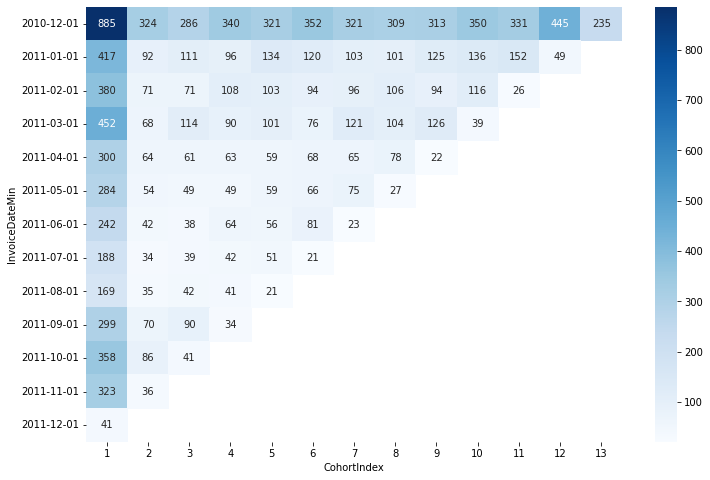

In [209]:
# heatmap을 통해 위에서 구한 잔존수을 시각화 합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, annot = True, fmt = ".0f",cmap = "Blues")

## 잔존율 구하기

In [213]:
# 가입한 달을 1로 나누면 잔존률을 구할 수 있습니다.
# div 를 통해 구하며 axis=0 으로 설정하면 첫 달을 기준으로 나머지 달을 나누게 됩니다.
# cohort_ratio
cohort_ratio = cohort_count.div(cohort_count[1], axis = 0) * 100
cohort_ratio = cohort_ratio.round(2)
cohort_ratio


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,100.0,36.61,32.32,38.42,36.27,39.77,36.27,34.92,35.37,39.55,37.40,50.28,26.55
2011-01-01,100.0,22.06,26.62,23.02,32.13,28.78,24.70,24.22,29.98,32.61,36.45,11.75,NaN
2011-02-01,100.0,18.68,18.68,28.42,27.11,24.74,25.26,27.89,24.74,30.53,6.84,NaN,NaN
2011-03-01,100.0,15.04,25.22,19.91,22.35,16.81,26.77,23.01,27.88,8.63,NaN,NaN,NaN
2011-04-01,100.0,21.33,20.33,21.00,19.67,22.67,21.67,26.00,7.33,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.01,17.25,17.25,20.77,23.24,26.41,9.51,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.36,15.70,26.45,23.14,33.47,9.50,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.09,20.74,22.34,27.13,11.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.71,24.85,24.26,12.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


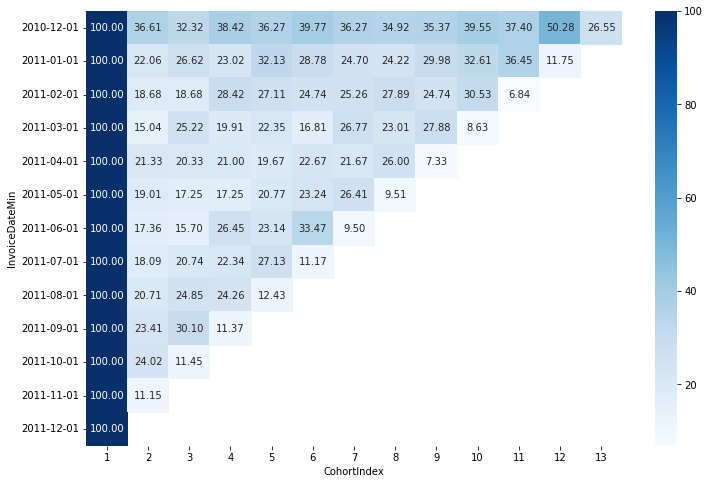

In [214]:
# heatmap을 통해 위에서 구한 잔존률을 시각화 합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_ratio, annot=True, fmt=".2f", cmap = "Blues")